In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd


In [4]:
churn=pd.read_csv("Churn_Modelling.csv")

In [5]:
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Data Visualization

Univariate Analysis

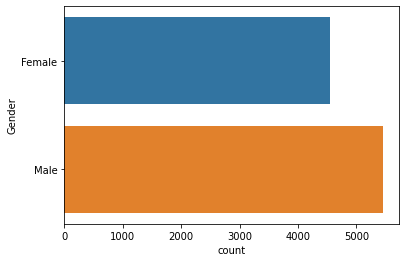

In [7]:
sns.countplot(y="Gender",data=churn)

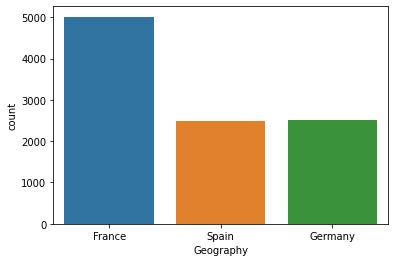

In [8]:
sns.countplot(x="Geography",data=churn)

Bivariate Analysis

In [9]:
churng=churn.groupby(by='IsActiveMember').agg('mean')[['Age','Balance','EstimatedSalary','CreditScore']]

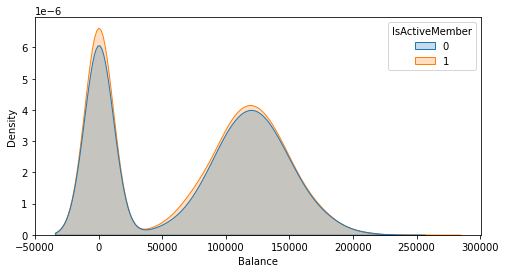

In [10]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=churn,x='Balance',hue='IsActiveMember',fill=True)

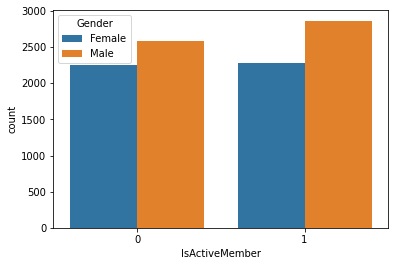

In [11]:
sns.countplot(data=churn,x='IsActiveMember',hue='Gender')

Multivariate Analysis

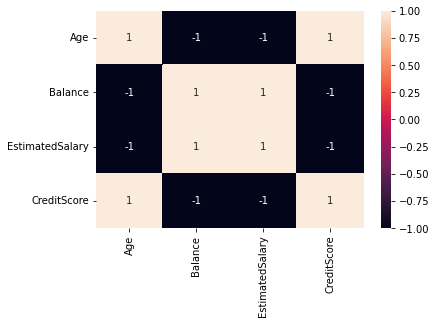

In [12]:
sns.heatmap(churng.corr(),annot=True)

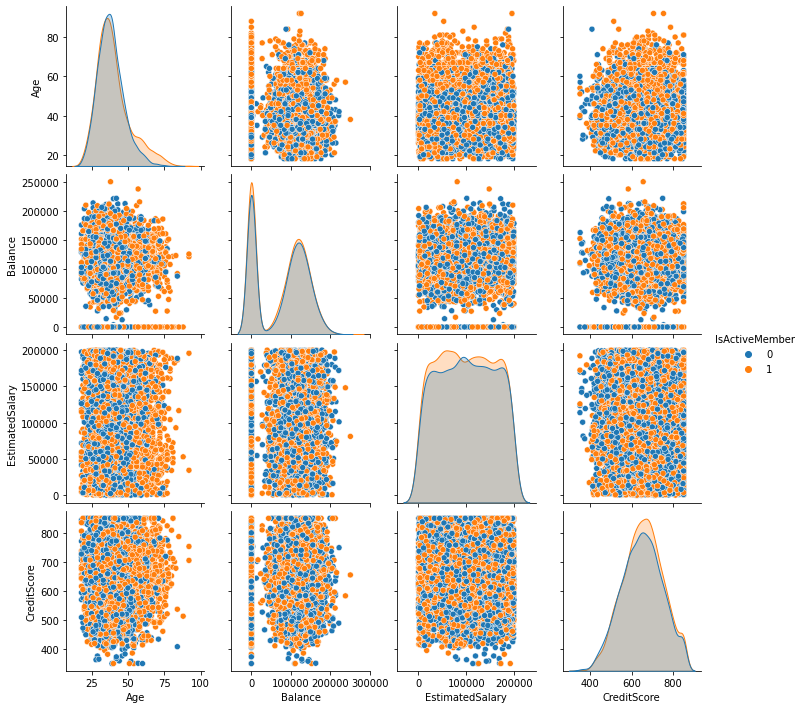

In [13]:
sns.pairplot(data=churn[['Age','Balance','EstimatedSalary','CreditScore','IsActiveMember']],hue='IsActiveMember')

Descriptive Statistics

In [14]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


handling the missing values

In [15]:
churn['CreditScore'].mean()

650.5288

In [16]:
churn['Age'].mean()

38.9218

In [17]:
churn['Tenure'].mean()

5.0128

In [18]:
churn['EstimatedSalary'].mean()

100090.239881

In [19]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
churn['Balance'].mean()

76485.889288

In [21]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

finding and replacing outliers

In [22]:
churn=churn.dropna(axis=0)

In [23]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

categorical columns check

In [24]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
churn_numeric=churn[['CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
churn_categorical=churn[['Surname','Geography','Gender']]

In [26]:
churn_numeric.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [27]:
churn_categorical.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [28]:
print(churn['Geography'].unique())
print(churn['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [29]:
from sklearn.preprocessing import LabelEncoder
Gen=LabelEncoder()

In [30]:
Gen.fit(churn_categorical['Gender'])
LabelEncoder()

LabelEncoder()

In [31]:
Genvalues=Gen.transform(churn_categorical['Gender'])
print("Before Encoding:",list(churn_categorical['Gender'][-10:]))
print("After Encoding",Genvalues[-10:])
print("The inverse from the encoding result:",Gen.inverse_transform(Genvalues[-10:]))

Before Encoding: ['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female']
After Encoding [1 0 1 1 0 1 1 0 1 0]
The inverse from the encoding result: ['Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Female']


In [32]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
Geo=OneHotEncoder()
Geo_Reshaped=np.array(churn_categorical['Geography']).reshape(-1,1)
Geo_Values=Geo.fit_transform(Geo_Reshaped)
print(churn_categorical['Geography'][:10])
print()
print(Geo_Values.toarray()[:10])
print()
print(Geo.inverse_transform(Geo_Values)[:10])

0     France
1      Spain
2     France
3     France
4      Spain
5      Spain
6     France
7    Germany
8     France
9     France
Name: Geography, dtype: object

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

[['France']
 ['Spain']
 ['France']
 ['France']
 ['Spain']
 ['Spain']
 ['France']
 ['Germany']
 ['France']
 ['France']]


Dependent and Independent Variables

In [33]:
x=churn.iloc[:,:-1].values
print(x)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [34]:
y=churn.iloc[:,-1].values
print(y)

[1 0 1 ... 1 1 0]


Training and Testing Split

In [35]:
training_data=churn.sample(frac=0.8,random_state=25)
testing_data=churn.drop(training_data.index)
print(f"No.of training examples:{training_data.shape[0]}")
print(f"No.of testing examples:{testing_data.shape[0]}")

No.of training examples:8000
No.of testing examples:2000
